# **Assignment 3**
---
*   BENC2011: Data Science 
*   Maastricht University, May 2023
*   Marek Chadim i6336489, Alexander Brecht i6244990


## 1.  Exploratory Data Analysis




We will do a brief exploration to get a better idea of what our dataset contains; this will give us a better idea of how to process the data. 


### 1.1 Numerical descriptive statistics

To calculate the descriptive statistics for the numeric features, we need to load the data and extract the numeric columns.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Let's start by loading the dataset and taking a look at the data.

In [2]:
df = pd.read_csv("datasets/customer_churn.csv")
df.head()

,client_num,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


The dataset contains information about credit card
customers such as their gender, marital status, number of dependents, education level, employment status, income, and whether the customer has churned or not.

The column `attrition_flag` is our target variable (the variable we want to predict). The other columns are our features (the variables we use to predict the target variable).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_num                10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

There are 0 columns with missing values; we can infer this from the “Non-Null Count” column. 

In [4]:
df.shape

(10127, 21)

In total, the dataset contains 10,127 rows and 21 columns

In [5]:
# Descriptive statistics for numeric features
numeric_features = df.select_dtypes(include=['float64', 'int64']).drop('client_num',axis=1)
numeric_features.describe()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### 1.2  Class comparison

To compare the descriptive statistics for churned and existing customers, we can group the dataset by the "attrition_flag" column and calculate the statistics for each group. 

In [6]:
# Descriptive statistics of existing and attrited customers

df["attrition_flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

[Text(0, 0, 'Attrited Customers'), Text(1, 0, 'Existing Customers')]

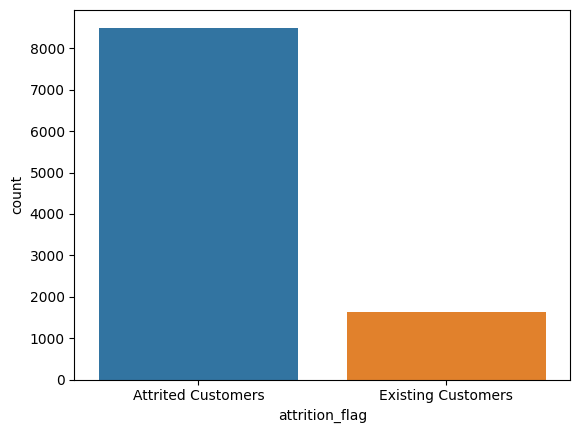

In [7]:
g=sns.countplot(data=df,x='attrition_flag')
g.set_xticklabels(['Attrited Customers','Existing Customers'])

In [8]:
df[df["attrition_flag"] == "Existing Customer"].drop('client_num',axis=1).describe().loc[["min", "max", "mean", "std"]]

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000
mean,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568


In [9]:
df[df["attrition_flag"] == "Attrited Customer"].drop('client_num',axis=1).describe().loc[["min", "max", "mean", "std"]]

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
max,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000
mean,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458





*   Total revolving balance on the credit card was almost twice as high for existing customers while also being less variable.
*   Total transaction amount in the last 12 months was lower for churning customers, at the same time, it varied more for existing customers.
*  On average, attrited customers utilizated their cards only half as much.






### 1.3 Categorical distributions

To calculate the distribution of categorical features, we need to count the occurrences of each category, divide it by the total number of observations and multiply for conversion into percentages. 

Existing Customer    83.934038
Attrited Customer    16.065962
Name: attrition_flag, dtype: float64

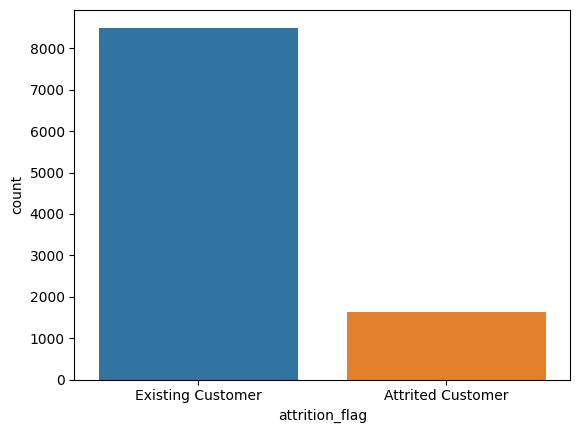

F    52.908068
M    47.091932
Name: gender, dtype: float64

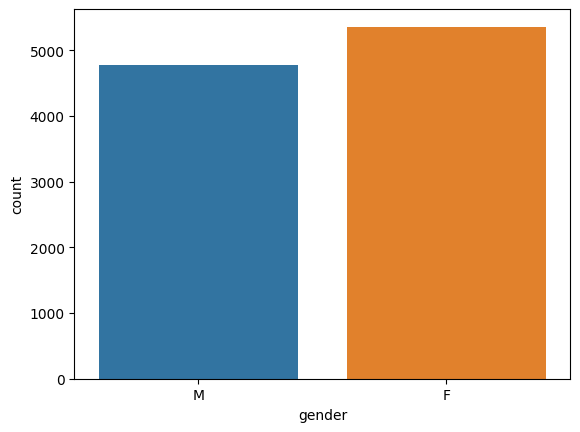

Graduate         30.887726
High School      19.877555
Unknown          14.999506
Uneducated       14.683519
College          10.002962
Post-Graduate     5.095290
Doctorate         4.453441
Name: education_level, dtype: float64

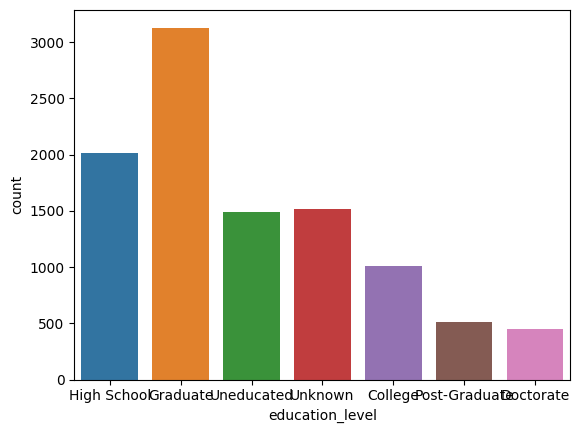

Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: marital_status, dtype: float64

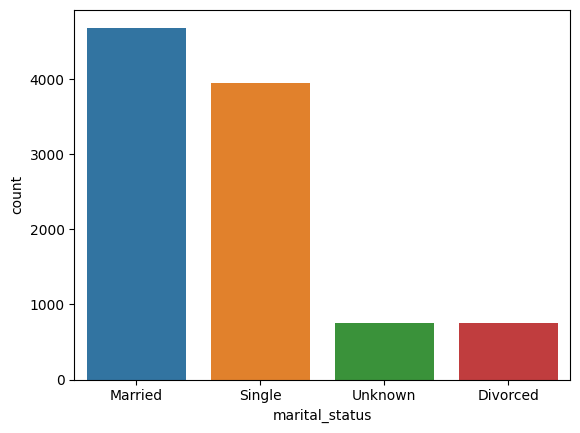

Less than $40K    35.163425
$40K - $60K       17.675521
$80K - $120K      15.157500
$60K - $80K       13.844179
Unknown           10.980547
$120K +            7.178829
Name: income_category, dtype: float64

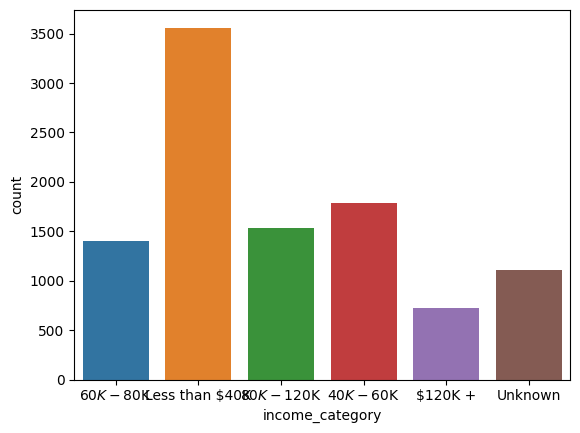

Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: card_category, dtype: float64

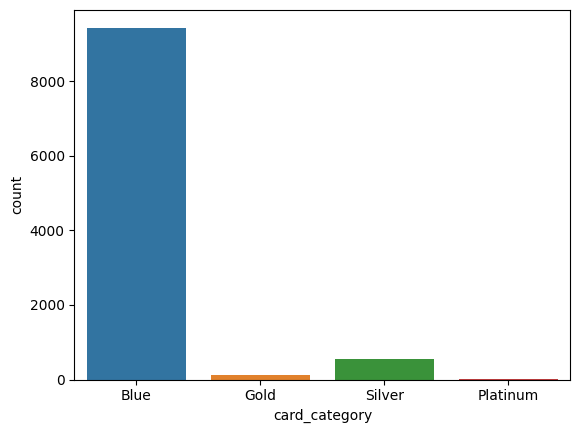

In [10]:
# Percentage distribution of all the categorical features 

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  display(df[column].value_counts(normalize=True) * 100)
  sns.countplot(x=df[column])
  plt.show()

### 1.4 Feature-label relationship

We visualize the relationship between the features2 `total_trans_amt`.
`total_revolving_bal`,
`avg_utilization_ratio` and the `attrition_flag` using boxplots as they allow for comparison of the distribution of a numeric feature for churned and existing customers. We omit the outliers for clearer output.

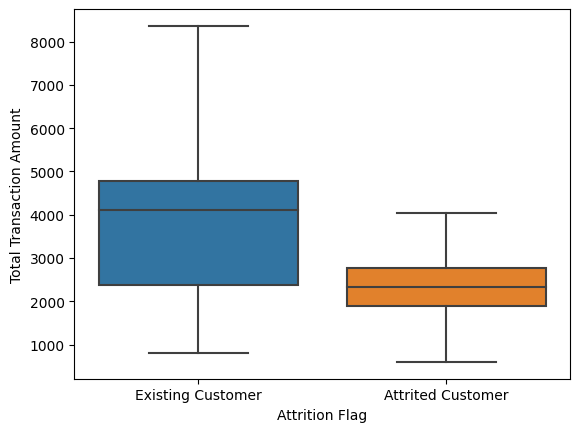

In [11]:
# Box plot for total_trans_amt 

sns.boxplot(x = 'attrition_flag',
            y = 'total_trans_amt',
            data = df,
            sym=""
           )
plt.xlabel("Attrition Flag")
plt.ylabel("Total Transaction Amount")
plt.show()

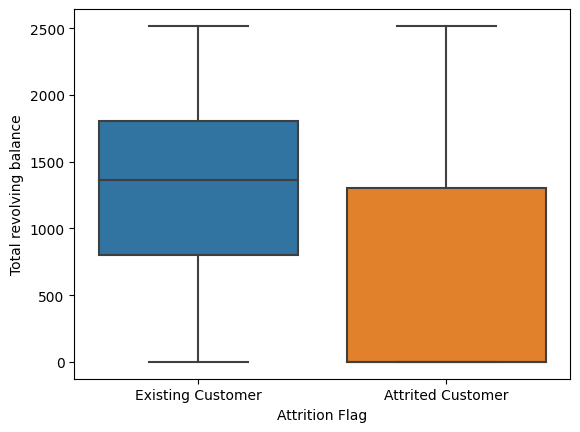

In [12]:
# Box plot for total_revolving_bal 

sns.boxplot(x = 'attrition_flag',
            y = 'total_revolving_bal',
            data = df,
            sym=""
           )
plt.xlabel("Attrition Flag")
plt.ylabel("Total revolving balance")
plt.show()

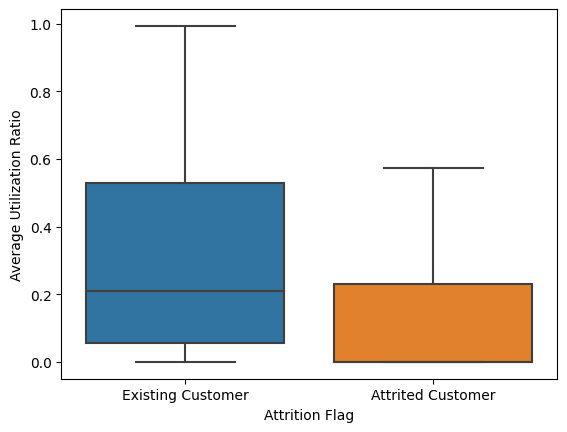

In [13]:
# Box plot for avg_utilization_ratio 

sns.boxplot(x = 'attrition_flag',
            y = 'avg_utilization_ratio',
            data = df,
            sym=""
           )
plt.xlabel("Attrition Flag")
plt.ylabel("Average Utilization Ratio")
plt.show()

## 2. Data Preprocessing

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.

In [14]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

 ### 2.1 Missing and duplicate values 

In [15]:
df_train.isna().sum()

client_num                  0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

At first sight, the data is without NAs

Yet, we have seen that some categorical variable entries contain the value "Unknown", which we convert to NAs for easier manipulation.

In [16]:
# Replace "Uknown" values with NaNs

df_train = df_train.replace('Unknown', np.NaN)
df_test = df_test.replace('Unknown', np.NaN)

# Show the percentage of missing values per column
df_train .isna().sum() / len(df) *100

client_num                   0.000000
attrition_flag               0.000000
customer_age                 0.000000
gender                       0.000000
dependent_count              0.000000
education_level             10.427570
marital_status               4.907673
income_category              7.544189
card_category                0.000000
months_on_book               0.000000
total_relationship_count     0.000000
months_inactive_12_mon       0.000000
contacts_count_12_mon        0.000000
credit_limit                 0.000000
total_revolving_bal          0.000000
avg_open_to_buy              0.000000
total_amt_chng_q4_q1         0.000000
total_trans_amt              0.000000
total_trans_ct               0.000000
total_ct_chng_q4_q1          0.000000
avg_utilization_ratio        0.000000
dtype: float64

The column with the highest proportion of missing values is `education_level`. 

In [17]:
# Duplicate value percentages per column

for column in df_train.columns:
    duplicate_count = df_train.duplicated(subset=column).sum() / len(df) *100
    print(f"{column}: {duplicate_count}")

client_num: 0.0
attrition_flag: 69.97136368124815
customer_age: 69.56650538165302
gender: 69.97136368124815
dependent_count: 69.93186531055593
education_level: 69.92199071788289
marital_status: 69.95161449590205
income_category: 69.93186531055593
card_category: 69.95161449590205
months_on_book: 69.55663078897996
total_relationship_count: 69.93186531055593
months_inactive_12_mon: 69.92199071788289
contacts_count_12_mon: 69.92199071788289
credit_limit: 22.47457292386689
total_revolving_bal: 52.078601757677504
avg_open_to_buy: 18.722227708107038
total_amt_chng_q4_q1: 59.61291596721635
total_trans_amt: 29.041177051446628
total_trans_ct: 68.74691418978968
total_ct_chng_q4_q1: 62.30867976695962
avg_utilization_ratio: 60.817616273328724


The `client_num` values are unique, but there is a substantial amount of duplicate values in all of the features. 

In [18]:
df_train.duplicated().sum()

0

However, there are no duplicated observations (rows).

 ### 2.2 Correction

We are going to impute the missing values with the most frequent values as present in the respective columns. This is good practice when it comes to imputing missing values for categorical data in general.


In [19]:
# Iterate over each column of df_train
for col in df_train.columns:
    # Check if the column is of object type
    if df_train[col].dtypes == 'object':
        # Impute with the most frequent value
        df_train = df_train.fillna(df_train[col].value_counts().index[0])
        df_test = df_test.fillna(df_train[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(df_train.isnull().sum())
print(df_test.isnull().sum())


client_num                  0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64
client_num                  0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon     

We do not modify the data for the purpose of handling duplicates as there are none in terms of observations.



 ### 2.3 Encoding

We need to convert categorical variables into numerical variables for the scikit-learn machine learning models to work.

We will do this by using the get_dummies() method from pandas.

In [20]:
df.select_dtypes(include=['object'])

,attrition_flag,gender,education_level,marital_status,income_category,card_category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [21]:
# Convert the categorical features in the train and test sets independently
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

# Reindex the columns of the test set aligning with the train set
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

 ### 2.4 Scaling

Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. Our dataset has varying ranges, one a small change in a particular feature may not have a significant effect on the other feature, which can cause a problems when predictive modeling.

In [22]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values
X_test, y_test = df_test.iloc[:, :-1].values, df_test.iloc[:, -1].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 3. Machine Learning 

Essentially, predicting if a customer will be churn or not is a classification task. Our dataset contains more instances that correspond to "Existing" status than instances corresponding to "Attrited" status. Specifically, out of 10 127 instances, there are 8500 (83.9%) existing and 1627 (44.5%) attrited customers.

### 3.1 Reasoning

We will evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. In the case of predicting customer churn, the most important metric is arguably recall. This metric indicates the proportion of positive results yielded by the model by the total number of positive labels in the dataset. In this case, the recall reveals the proportion of churns identified correctly by the total number of churns. The confusion matrix helps us to view our model's performance from these aspects.

Splitting the data into training and test sets allows for training the model on the training set and evaluating it on the test set. This approach has a drawback in that it only uses part of the data for training. Moreover, the random split might have put most of the difficult examples in the training set and most of the easy examples in the test set. Instead, we will use a k-fold cross-validation, we split the data into `k` folds. Then, we train the model `k` times. Each time, we use a different fold for testing and the remaining folds for training. Finally, we average the results of the k models to get the final result.

### 3.2 Training



We start our machine learning modeling with a Logistic Regression model (a generalized linear model). In simple terms, logistic regression takes information about an item and calculates the probability of it belonging to a specific group.

In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression()

We also train a Decision Tree Classifier, which can be thought of as a flowchart or a tree-like structure that helps in making decisions by following a series of simple rules or questions.

In [24]:
# Import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
dt = DecisionTreeClassifier()

# Fit rf to the train set
dt.fit(rescaledX_train,y_train)

DecisionTreeClassifier()

### 3.3 Hyperparameter-tuning 

Each machine learning algorithm has its own specific hyperparameters. These are at are set before the model is trained, and these values inform how the model learns from the data.

Grid search is a brute force search through the hyperparameter space to find the optimal value for the hyperparameter of interest.

The default hyperparameters used by your models are not optimized for the data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance.

[scikit-learn's implementation of logistic regression](https:scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) consists of different hyperparameters but we will grid search over the following two:
* tol
* max_iter

In [25]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid1 = dict(tol=tol, max_iter=max_iter)

We have defined the grid of hyperparameter values and converted them into a single dictionary format which GridSearchCV() expects as one of its parameters. Now, we will begin the grid search to see which values perform best.

We will instantiate GridSearchCV() with our earlier logreg model with all the data we have. We will also instruct GridSearchCV() to perform a cross-validation of five folds.

In [26]:
# Instantiate GridSearchCV with the required parameters
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid1, cv=5)

# Fit grid_model to the data
grid_search_logreg_result = grid_search_logreg.fit(rescaledX_train,y_train)

# Summarize results
best_score, best_params = grid_search_logreg_result.best_score_, grid_search_logreg_result.best_params_
print("Best: %f using %s" % (best_score, best_params))



Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}


We optimise the maximum depth and the minimum number of samples required to split an internal node of the decision tree classifier.

In [27]:
# Define the parameter grid
param_grid2 = {"max_depth": [1, 3, 5, 7, 9], "min_samples_leaf": [1, 5, 10]}
# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(dt, param_grid2, cv=5)
# Fit the grid search to the data
grid_search_dt.fit(rescaledX_train,y_train)
# Print the best parameter and best score
print("Best Parameter:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)


Best Parameter: {'max_depth': 3, 'min_samples_leaf': 1}
Best Score: 1.0


### 3.4 Model comparison

Using the test split, we compare the best logistic regression and  decision tree classifiers with a classification report.

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Decision tree
print(classification_report(y_test, grid_search_logreg.best_estimator_.predict(rescaledX_test)))
print(classification_report(y_test, grid_search_dt.best_estimator_.predict(rescaledX_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862
           1       1.00      1.00      1.00       177

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2862
           1       1.00      1.00      1.00       177

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039



Since all metrics are equal to 1 both models achieved to predict all labels correctly.

## 4. Model Evaluation and Analysis 

This section provides additional comments explanations and discussionson on class-level errors and compares specific metrics.

### 4.1  Confusion matrices

The confusion matrix provides a visual representation of the model's performance, making it easier to see where the model is making correct predictions and where it is making mistakes. The diagonal elements in the confusion matrix represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions.

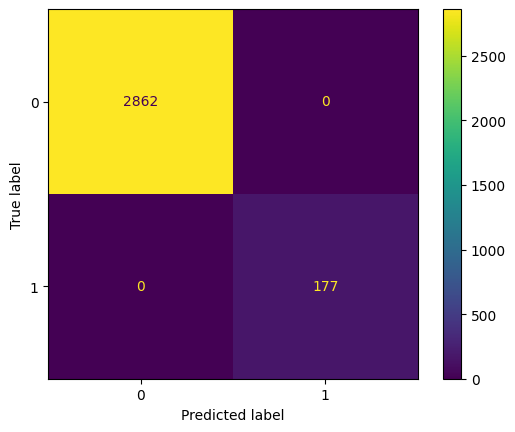

In [29]:
# Logistic Regression
display(ConfusionMatrixDisplay.from_estimator(grid_search_logreg.best_estimator_, rescaledX_test, y_test))

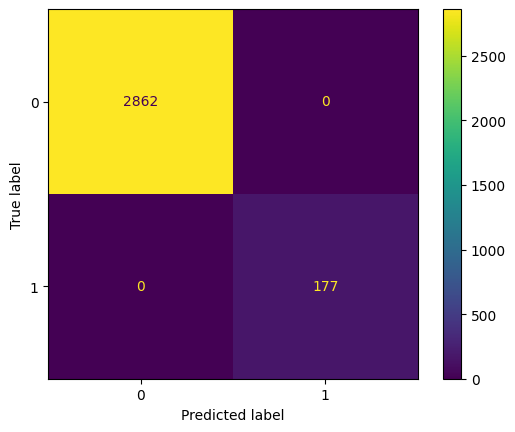

In [30]:
#  Decision Tree
display(ConfusionMatrixDisplay.from_estimator(grid_search_dt.best_estimator_, rescaledX_test, y_test))

Both models are "perfect" in that they have all predictions on the diagonal, resulting in a confusion matrix with zero values in all off-diagonal elements.

### 4.2  Precision, recall, and accuracy 

Accuracy score is a commonly used metric to evaluate the performance of classification models. An accuracy score of 0.95 means that the model correctly predicts the class labels for 95% of the samples in the test set. A higher accuracy score indicates better performance, but it's important to keep in mind that accuracy can be misleading in cases where the dataset is imbalanced or when the model's performance on specific classes is more important. In such cases, other evaluation metrics like precision, recall, or F1 score might be more appropriate.

In [31]:
from sklearn.metrics import accuracy_score

# Predict class labels for the test and train sets
pred_logreg = grid_search_logreg.best_estimator_.predict(rescaledX_test)
pred_dt = grid_search_dt.best_estimator_.predict(rescaledX_test)


# Calculate the accuracy scores for the decision tree and logistic regression models
logreg_acc = accuracy_score(y_test, pred_logreg)
dt_acc = accuracy_score(y_test, pred_dt)


# Print the accuracy scores
print(f"Logistic Regression accuracy: {logreg_acc}\nDT accuracy: {dt_acc}")

Logistic Regression accuracy: 1.0
DT accuracy: 1.0


Recall (sensitivity or true positive rate) measures the proportion of actual positive instances that were correctly predicted by the model. A high recall indicates that the model is good at identifying positive instances.

Precision (positive predictive value) measures the proportion of true positive instances among the instances predicted as positive by the model. A high precision indicates that the model is good at not labeling negative instances as positive.

F1 score is the harmonic mean of precision and recall, and it balances both metrics. It's a good single-number summary of a model's performance, especially when dealing with imbalanced datasets or when both false positives and false negatives are important to consider.

In [32]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Calculate recall, precision, and F1 score for the logistic regression model
recall = recall_score(y_test, pred_logreg, average="macro")
prec_score = precision_score(y_test, pred_logreg, average="macro")
f1 = f1_score(y_test, pred_logreg, average="macro")

# Print the recall, precision, and F1 score
print(f"Logistic Regression precision, recall, and F1: {recall, prec_score, f1}")



# Calculate recall, precision, and F1 score for the decision tree model
recall = recall_score(y_test, pred_dt, average="macro")
prec_score = precision_score(y_test, pred_dt, average="macro")
f1 = f1_score(y_test, pred_dt, average="macro")

# Print the recall, precision, and F1 score
print(f"Decision Tree precision, recall, and F1: {recall, prec_score, f1}")



Logistic Regression precision, recall, and F1: (1.0, 1.0, 1.0)
Decision Tree precision, recall, and F1: (1.0, 1.0, 1.0)


As seen before from the classification report, both models predicted all labels correctly, resulting in all evaluation metrics equal to 1.


### 4.3  Income category performance

We have seen before that with cross-validation and hyperparameter tuning, both models achieved to label all customers in the test split correctly, thus independetly with regards to income category.

We therefore perform a slightly less involved methodology in the following code to analyze whether performance differs among income categories. Specifically, we do not impute "Unkown" values and do not apply cross validation and hyperparameter tuning. As mentioned before, recall will be of particular interest to us.


In [33]:
  # Define the income categories
  income_categories = df['income_category'].unique()

  # Iterate over income categories
  for category in income_categories:
    print(f"Income Category: {category}")    
    
    # Subset the data for the current income category
    subset_data = df[df['income_category'] == category]

    #Encode
    subset_data = pd.get_dummies(subset_data, columns=categorical_columns[1:])
    X = subset_data.drop("attrition_flag", axis=1).values
    # We do not need to encode the target variable, but it makes evaluation easier later
    y = subset_data["attrition_flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0).values

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Rescale features
    rescaledX_train = scaler.fit_transform(X_train)
    rescaledX_test = scaler.transform(X_test)

    #  using logistic regression
    logreg = LogisticRegression()
    logreg.fit(rescaledX_train, y_train)
    logreg_preds = logreg.predict(rescaledX_test)
    logreg_report = classification_report(y_test, logreg_preds)
    print("Logistic Regression Classification Report:")
    print(logreg_report)

    #  using random forest
    dt = DecisionTreeClassifier()
    dt.fit(rescaledX_train, y_train)
    dt_preds = dt.predict(rescaledX_test)
    dt_report = classification_report(y_test, dt_preds)
    print("Decision Tree Classification Report:")
    print(dt_report)


Income Category: $60K - $80K
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       240
           1       0.79      0.37      0.50        41

    accuracy                           0.89       281
   macro avg       0.85      0.67      0.72       281
weighted avg       0.88      0.89      0.88       281

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       240
           1       0.68      0.68      0.68        41

    accuracy                           0.91       281
   macro avg       0.81      0.81      0.81       281
weighted avg       0.91      0.91      0.91       281

Income Category: Less than $40K
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       598
           1       0.71      0.57      0.63       115

The evaluation of classification models for each income category reveals varying performances. The overall performance of the models is similar, with the decision tree slightly outperforming the logistic regression. The models performed best for the "$40K - $60K" income category.



 * In the "$60K - $80K" category, the logistic regression model achieved an accuracy of 89%, but failed to identify any attrited customers accurately. The decision tree model performed similar in terms of accuracy, however it achieved higher recall and f1.

 * For the "Less than $40K" category, the logistic regression model achieved 89% accuracy. The random forest model performed better, with higher recall and F1-score for both classes.

 * In the "$80K - $120K" category. Logistic regression achieved higher precision, while the decision tree model achieved had again higher recall and f1.

 * In the "$40K - $60K" category,  the decision tree model achieved outperformed the logistic regression model in all metrics.

 * For the "$120K+" category, logistic regression achieved 87% accuracy and the random forest model achieved 85% accuracy.

## Extra

### ROC

Additionaly, we can visualize the performance of our best models at on the test data using the ROC curve.

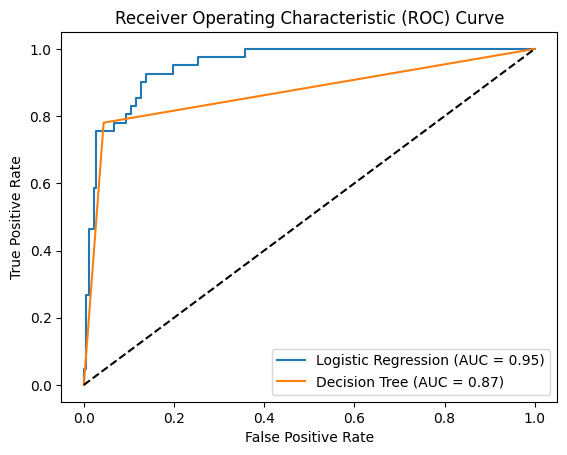

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the predicted probabilities for each class
logreg_probabilities = logreg.predict_proba(rescaledX_test)[:, 1]  # Predicted probabilities for class 1 (churn) for Logistic Regression
dt_probabilities = dt.predict_proba(rescaledX_test)[:, 1]  # Predicted probabilities for class 1 (churn) for Decision Tree

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(y_test, logreg_probabilities)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probabilities)

# Calculate the AUC score for the ROC curve
logreg_auc_score = roc_auc_score(y_test, logreg_probabilities)
dt_auc_score = roc_auc_score(y_test, dt_probabilities)

# Plot the ROC curve
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc_score))
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = {:.2f})'.format(dt_auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Both models achieved the perfect AUC score of 1, therefore their ROC curves overlap.

### Resampling

Class imbalance is evident in the dataset, particularly in the classification task of identifying churned customers (Attrited Customer) versus existing customers. The classification reports exhibit notable differences in precision, recall, and F1-score between the two classes, indicating an imbalance in the dataset. For instance, in the "Less than $40K" income category, the precision for the Attrited Customer class is 0.00, suggesting that the model struggles to correctly identify churned customers in this category.

To address class imbalance, various techniques can be applied. One effective approach is resampling the dataset to balance the class distribution. Oversampling techniques such as Synthetic Minority Over-sampling Technique (SMOTE) can be employed to create synthetic samples for the minority class, thus increasing its representation in the dataset. Alternatively, undersampling the majority class can be employed, reducing its instances to match the minority class's size.

In [35]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(rescaledX_train, y_train)


We can visualize the resampling in the following plot 

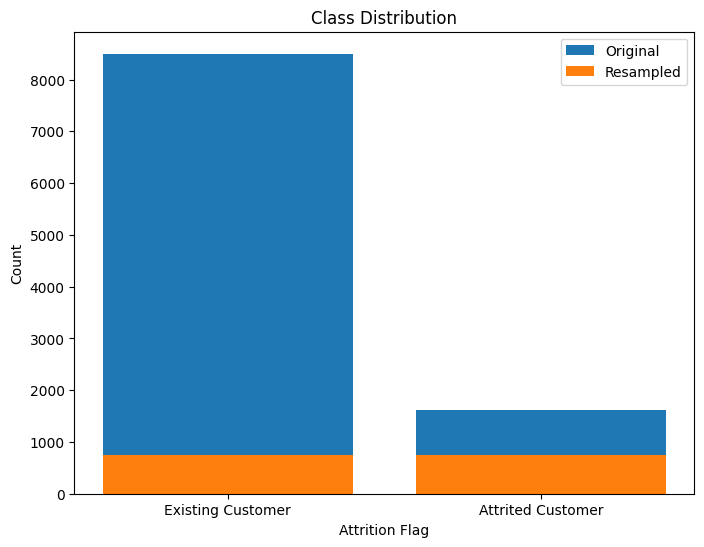

In [36]:

# Count the occurrences of each class 
class_counts_original = df['attrition_flag'].value_counts()

# Count the occurrences of each class in the resampled dataset
class_counts_resampled = pd.Series(y_train_resampled).value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts_original.index, class_counts_original.values, label='Original')
plt.bar(class_counts_resampled.index, class_counts_resampled.values, label='Resampled')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.legend()
plt.show()


In [37]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Resample the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(rescaledX_train, y_train)

# Model 1: Logistic Regression with resampled data
logreg_resampled = LogisticRegression()
logreg_resampled.fit(X_train_resampled, y_train_resampled)
logreg_resampled_preds = logreg_resampled.predict(rescaledX_test)

# Model 2: Decision Tree Classifier with resampled data
dt_resampled = DecisionTreeClassifier()
dt_resampled.fit(X_train_resampled, y_train_resampled)
dt_resampled_preds = dt_resampled.predict(rescaledX_test)

# Evaluate the resampled models
logreg_resampled_report = classification_report(y_test, logreg_resampled_preds)
dt_resampled_report = classification_report(y_test, dt_resampled_preds)

print("Logistic Regression Classification Report (Resampled):")
print(logreg_resampled_report)
print("Decision Tree Classification Report (Resampled):")
print(dt_resampled_report)


Logistic Regression Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       182
           1       0.64      0.88      0.74        41

    accuracy                           0.89       223
   macro avg       0.81      0.88      0.84       223
weighted avg       0.91      0.89      0.89       223

Decision Tree Classification Report (Resampled):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       182
           1       0.79      0.83      0.81        41

    accuracy                           0.93       223
   macro avg       0.88      0.89      0.88       223
weighted avg       0.93      0.93      0.93       223



Resampling the data resulted in a similar performanceof both models, the decision tree outperforming the linear regression just slightly again.